<a href="https://colab.research.google.com/github/AdithyaMaddala/Hypothetical-Credit-Score/blob/main/Hypothetical_Credit_Score.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Credit Score:
A credit score is a number provided by a financial institution where it ranges based on company to company

(ex: CIBIL 300 to 900 and -1)
Where 300 is bad/worst, 900 is the best, -1 is no information available

There are many factors evaluated to give this score mainly based on FICO score where

In [1]:
# downloading the data set
!gdown 1pljm6_3nxcFS9UMIFm124HBsjNZP6ACA

Downloading...
From: https://drive.google.com/uc?id=1pljm6_3nxcFS9UMIFm124HBsjNZP6ACA
To: /content/Credit_score.csv
100% 27.4M/27.4M [00:00<00:00, 43.6MB/s]


In [2]:
# importing necessary libraries
import pandas as pd
import numpy as np

# visual
import matplotlib.pyplot as plt
import seaborn as sns

# ignoring warnings
import warnings
warnings.filterwarnings('ignore')

# loading data into a variable
df = pd.read_csv("Credit_score.csv")

In [ ]:
df.shape

(100000, 27)

In [ ]:
df.head(10)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529544,High_spent_Small_value_payments,312.4940887
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,4.0,Good,809.98,31.944960,NaN,No,49.574949,118.2802216,Low_spent_Large_value_payments,284.6291625
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,4.0,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.69952126,Low_spent_Medium_value_payments,331.2098629
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,4.0,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580744,Low_spent_Small_value_payments,223.4513097
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.42015309,High_spent_Medium_value_payments,341.489231
5,0x1607,CUS_0xd40,June,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,4.0,Good,809.98,27.262259,22 Years and 6 Months,No,49.574949,62.43017233,!@9#%8,340.4792118
6,0x1608,CUS_0xd40,July,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,Good,809.98,22.537593,22 Years and 7 Months,No,49.574949,178.3440674,Low_spent_Small_value_payments,244.5653167
7,0x1609,CUS_0xd40,August,NaN,23,#F%$D@*&8,Scientist,19114.12,1824.843333,3,...,4.0,Good,809.98,23.933795,NaN,No,49.574949,24.78521651,High_spent_Medium_value_payments,358.1241676
8,0x160e,CUS_0x21b1,January,Rick Rothackerj,28_,004-07-5839,_______,34847.84,3037.986667,2,...,2.0,Good,605.03,24.464031,26 Years and 7 Months,No,18.816215,104.2918252,Low_spent_Small_value_payments,470.6906269
9,0x160f,CUS_0x21b1,February,Rick Rothackerj,28,004-07-5839,Teacher,34847.84,3037.986667,2,...,2.0,Good,605.03,38.550848,26 Years and 8 Months,No,18.816215,40.39123783,High_spent_Large_value_payments,484.5912143


#Helper Functions

In [3]:
def get_column_details(df,column):
  print(f"Details of {column} column")

  # Column datatype
  print("\n Datatype:", df[column].dtype)

  # Number of nulls present in column
  null_count = df[column].isnull().sum()
  if null_count == 0:
    print("\nThere are no null values")
  else:
    print(f"\nThere are {null_count} null values")

  # Number of unique values
  print("\nNumber of unique values:", df[column].nunique())

  # Distribuion of column
  print("\nDistribution of values:")
  print(df[column].value_counts())

# Filling missing values
def fill_missing_with_group_mode(df, groupby, column):
  print("Number of missing values before filling with group mode:",df[column].isnull().sum())

  # Assign None to np.NaN
  if df[column].isin([None]).sum():
    df[column][df[column].isin([None])] = np.NaN

  mode_per_group = df.groupby(groupby)[column].transform(lambda x: x.mode().iat[0])
  df[column] = df[column].fillna(mode_per_group)

  print("\nNumber of missing values after filling with group mode:",df[column].isnull().sum())

# iloc for slicing and iat for you can only have one scaler entity

# Cleaning Categorical Field
def clean_categorical_field(df,groupby,column,replace_value=None):
  print("\n-----------------------------------------------------")
  print("\nCleaning steps ")

  #Replace with np.nan
  if replace_value!=None:
      df[column] = df[column].replace(replace_value,np.nan)
      print(f"\nGarbage value {replace_value} is replaced with np.nan")

  #For each Customer_ID, assign same value for the column
  fill_missing_with_group_mode(df,groupby,column)

In [5]:
def plot_displot(df,column,user_friendly_column_name,rotation=0,bins=20):
  print("\n-----------------------------------------------------")
  print(f'\n{user_friendly_column_name} Distribution')
  palette = "deep"
  sns.set_palette(palette)

  sns.displot(data=df, x=column, kde=True, bins=bins)

  plt.xlabel(f'{user_friendly_column_name}')
  plt.ylabel('Number of Records')
  plt.title(f'{user_friendly_column_name} Distribution')
  plt.xticks(rotation=rotation)

  plt.show()


def plot_countplot(df,column,user_friendly_column_name,rotation=0):
  print("\n-----------------------------------------------------")
  print(f'\n{user_friendly_column_name} Distribution')
  palette = "deep"
  sns.set_palette(palette)

  sns.countplot(data=df, x=column)

  plt.xlabel(f'{user_friendly_column_name}')
  plt.ylabel('Number of Records')
  plt.title(f'{user_friendly_column_name} Distribution')
  plt.xticks(rotation=rotation)

  plt.show()

In [ ]:
def get_group_min_max(df,groupby,column):
  """
  This function calculates the minimum and maximum of the mode values within each group for a specific column.
  It groups the DataFrame by a specified column and returns the minimum and maximum values of the most frequent (mode) values for that group.

  Parameters:
  df (DataFrame): The DataFrame containing the data.
  groupby (str): The column name to group the data by.
  column (str): The column name for which we are calculating the min/max of the mode.

  Returns:
  tuple: Minimum and maximum mode values from the grouped data.
  """
  # drop NaN values in the specified column
  df_clean = df.dropna(subset=[column])

  # compute the modes for each group
  group_modes = df_clean.groupby(groupby)[column].agg(lambda x: x.mode().iat[0] if not x.mode().empty else np.nan)

  min_mode = group_modes.min()
  max_mode = group_modes.max()

  return min_mode, max_mode

def fix_inconsistent_values(df,groupby,column):
  """
  This function handles outliers and fixes inconsistent values in the DataFrame using group-wise median and MAD.
  It ensures that values in the specified column remain within reasonable bounds and fills NaN or inconsistent values
  with the median of their respective group or the global median.

  Parameters:
  df (DataFrame): The DataFrame containing the data.
  groupby (str): The column name to group the data by.
  column (str): The column name for which we are fixing inconsistent values.

  Returns:
  None: The function modifies the DataFrame in-place.
  """
  # Step 1: print the existing minimum and maximum values in the entire column before cleaning
  print("\nExisting Min, Max Values:")
  print(f'{df[column].min()}\n{df[column].max()}')
  # Step 2: compute the group wise median and MAD using transform for efficiency
  group_median = df.groupby(groupby)[column].transform('median')
  group_mad = df.groupby(groupby)[column].transform(
      lambda x: np.median(np.abs(x - np.median(x)))
    )
  # Step 3: Define acceptable range as median ± 3 * MAD
  # Since MAD is a measure of dispersion similar to standard deviation but more robust
  # Multiplying by 1.4826 scales MAD to be comparable to standard deviation for normal distribution
  factor = 1.4826  # Scaling factor to make MAD comparable to standard deviation
  lower_bound = group_median - (3 * group_mad * factor)
  upper_bound = group_median + (3 * group_mad * factor)

  # If MAD is NaN (group_mad is NaN), set lower and upper bounds to median
  lower_bound.fillna(group_median, inplace=True)
  upper_bound.fillna(group_median, inplace=True)

  # Replace outliers and negative values with NaN
  df.loc[(df[column] < lower_bound) | (df[column] > upper_bound) | (df[column] < 0), column] = np.nan

  # Step 4: Fill NaN values with median of the respective group
  df[column] = df.groupby(groupby)[column].transform(lambda x: x.fillna(x.median()))

  # Step 5: Fill remaining NaN values with global median
  if df[column].isnull().any():
    global_median = df[column].median()
    df[column].fillna(global_median, inplace=True)

  # Step 6: Print the new minimum and maximum values after cleaning
  print("\nAfter Cleaning Min, Max Values:")
  print(f'{df[column].min()}\n{df[column].max()}')

  # Step 7: Print the number of unique values and null values after cleaning
  print("\nNumber of unique values after cleaning:", df[column].nunique())
  print("\nNumber of null values after cleaning:", df[column].isnull().sum())

# Method to Clean Numerical Field
def clean_numerical_field(df,groupby, column, strip=None, datatype=None, replace_value=None):
  print("\n-----------------------------------------------------")
  print("\nCleaning steps ")

  # Replace with np.nan
  if replace_value!=None:
    df[column] = df[column].replace(replace_value,np.nan)
    print(f"\nGarbage value {replace_value} is replaced with np.nan")

  # Remove trailing & leading special characters
  if df[column].dtype == "object" and strip is not None:
    df[column] = df[column].str.strip(strip)
    print(f"\nTrailing and leading {strip} is removed")

  # Change datatype
  if datatype is not None:
    df[column] = df[column].astype(datatype)
    print(f"\nDatatype is changed to {datatype}")

  # change datatype
  if datatype is not None:
    df[column] = df[column].astype(datatype)
    print(f"\nDatatype of {column} is changed to {datatype}")

  # Fix inconsistent values
  fix_inconsistent_values(df,groupby,column)

In [6]:
get_column_details(df,"ID")

Details of ID column

 Datatype: object

There are no null values

Number of unique values: 100000

Distribution of values:
ID
0x1602     1
0x19c88    1
0x19caa    1
0x19ca5    1
0x19ca4    1
          ..
0xd94d     1
0xd94c     1
0xd94b     1
0xd94a     1
0x25fed    1
Name: count, Length: 100000, dtype: int64


In [7]:
get_column_details(df,"Customer_ID")

Details of Customer_ID column

 Datatype: object

There are no null values

Number of unique values: 12500

Distribution of values:
Customer_ID
CUS_0xd40     8
CUS_0x9bf4    8
CUS_0x5ae3    8
CUS_0xbe9a    8
CUS_0x4874    8
             ..
CUS_0x2eb4    8
CUS_0x7863    8
CUS_0x9d89    8
CUS_0xc045    8
CUS_0x942c    8
Name: count, Length: 12500, dtype: int64


In [8]:
get_column_details(df,"Name")

Details of Name column

 Datatype: object

There are 9985 null values

Number of unique values: 10139

Distribution of values:
Name
Langep            44
Stevex            44
Vaughanl          39
Jessicad          39
Raymondr          38
                  ..
Alina Selyukhg     4
Habboushg          4
Mortimerq          4
Ronaldf            4
Timothyl           3
Name: count, Length: 10139, dtype: int64


In [9]:
fill_missing_with_group_mode(df,"Customer_ID","Name")

Number of missing values before filling with group mode: 9985

Number of missing values after filling with group mode: 0


In [10]:
get_column_details(df,"Age")

Details of Age column

 Datatype: object

There are no null values

Number of unique values: 1788

Distribution of values:
Age
38      2833
28      2829
31      2806
26      2792
32      2749
        ... 
471        1
1520       1
8663       1
3363       1
1342       1
Name: count, Length: 1788, dtype: int64



-----------------------------------------------------

Cleaning steps 

Trailing and leading _ is removed

Datatype is changed to int

Datatype of Age is changed to int

Existing Min, Max Values:
-500
8698

After Cleaning Min, Max Values:
14.0
56.0

Number of unique values after cleaning: 63

Number of null values after cleaning: 0

-----------------------------------------------------

Age Distribution


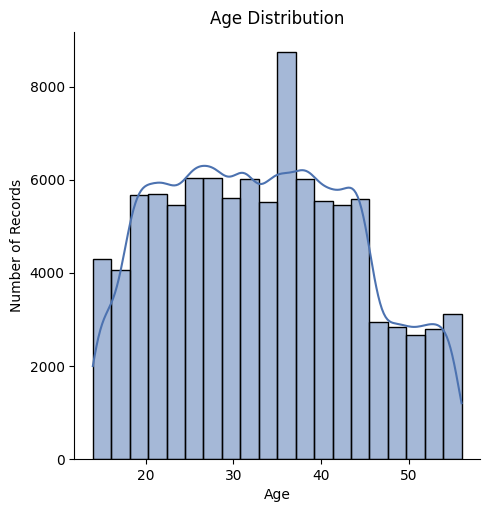

In [11]:
# cleaning
clean_numerical_field(df,groupby='Customer_ID',column='Age',strip='_',datatype='int')

# plotting
plot_displot(df,column = 'Age', user_friendly_column_name='Age')

In [12]:
get_column_details(df,"SSN")

Details of SSN column

 Datatype: object

There are no null values

Number of unique values: 12501

Distribution of values:
SSN
#F%$D@*&8      5572
078-73-5990       8
486-78-3816       8
750-67-7525       8
903-50-0305       8
               ... 
856-06-6147       4
753-72-2651       4
331-28-1921       4
604-62-6133       4
286-44-9634       4
Name: count, Length: 12501, dtype: int64


In [13]:
group_by = "Customer_ID"
column = "SSN"
replace_value = "#F%$D@*&8"

clean_categorical_field(df,group_by,column,replace_value)


-----------------------------------------------------

Cleaning steps 

Garbage value #F%$D@*&8 is replaced with np.nan
Number of missing values before filling with group mode: 5572

Number of missing values after filling with group mode: 0


In [14]:
get_column_details(df,"Occupation")

Details of Occupation column

 Datatype: object

There are no null values

Number of unique values: 16

Distribution of values:
Occupation
_______          7062
Lawyer           6575
Architect        6355
Engineer         6350
Scientist        6299
Mechanic         6291
Accountant       6271
Developer        6235
Media_Manager    6232
Teacher          6215
Entrepreneur     6174
Doctor           6087
Journalist       6085
Manager          5973
Musician         5911
Writer           5885
Name: count, dtype: int64


In [15]:
get_column_details(df,"Annual_Income")

Details of Annual_Income column

 Datatype: object

There are no null values

Number of unique values: 18940

Distribution of values:
Annual_Income
36585.12     16
20867.67     16
17273.83     16
9141.63      15
33029.66     15
             ..
20269.93_     1
15157.25_     1
44955.64_     1
76650.12_     1
4262933       1
Name: count, Length: 18940, dtype: int64


In [16]:
# cleaning
clean_numerical_field(df,groupby='Customer_ID',column='Annual_Income',strip='_',datatype='float')


-----------------------------------------------------

Cleaning steps 

Trailing and leading _ is removed

Datatype is changed to float

Datatype of Annual_Income is changed to float

Existing Min, Max Values:
7005.93
24198062.0

After Cleaning Min, Max Values:
7005.93
179987.28

Number of unique values after cleaning: 12489

Number of null values after cleaning: 0



-----------------------------------------------------

Annual Income Distribution


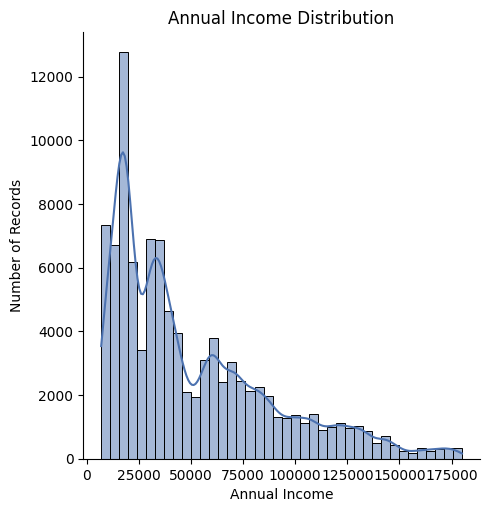

In [17]:
# plotting
column_name = "Annual_Income"
user_friendly_column_name = "Annual Income"
plot_displot(df,column_name, user_friendly_column_name,bins=40)

In [18]:
get_column_details(df,"Month")

Details of Month column

 Datatype: object

There are no null values

Number of unique values: 8

Distribution of values:
Month
January     12500
February    12500
March       12500
April       12500
May         12500
June        12500
July        12500
August      12500
Name: count, dtype: int64


In [19]:
get_column_details(df,"Monthly_Inhand_Salary")

Details of Monthly_Inhand_Salary column

 Datatype: float64

There are 15002 null values

Number of unique values: 13235

Distribution of values:
Monthly_Inhand_Salary
6769.130000    15
6358.956667    15
2295.058333    15
6082.187500    15
3080.555000    14
               ..
1087.546445     1
3189.212103     1
5640.117744     1
7727.560450     1
2443.654131     1
Name: count, Length: 13235, dtype: int64



-----------------------------------------------------

Cleaning steps 

Datatype is changed to float

Datatype of Monthly_Inhand_Salary is changed to float

Existing Min, Max Values:
303.6454167
15204.63333

After Cleaning Min, Max Values:
303.6454167
15204.63333

Number of unique values after cleaning: 12487

Number of null values after cleaning: 0

-----------------------------------------------------

Monthly_Inhand_Salary Distribution


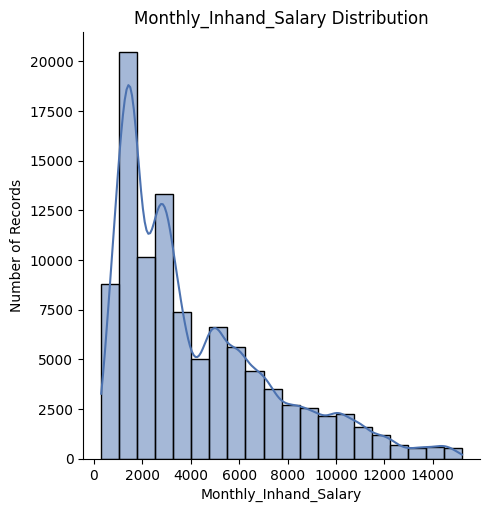

In [20]:
# cleaning
clean_numerical_field(df,groupby='Customer_ID',column='Monthly_Inhand_Salary',datatype='float')

# plotting
plot_displot(df,column = 'Monthly_Inhand_Salary', user_friendly_column_name='Monthly_Inhand_Salary')

In [21]:
get_column_details(df,"Num_Bank_Accounts")

Details of Num_Bank_Accounts column

 Datatype: int64

There are no null values

Number of unique values: 943

Distribution of values:
Num_Bank_Accounts
6       13001
7       12823
8       12765
4       12186
5       12118
        ...  
1626        1
1470        1
887         1
211         1
697         1
Name: count, Length: 943, dtype: int64



-----------------------------------------------------

Cleaning steps 

Datatype is changed to int

Datatype of Num_Bank_Accounts is changed to int

Existing Min, Max Values:
-1
1798

After Cleaning Min, Max Values:
0.0
11.0

Number of unique values after cleaning: 12

Number of null values after cleaning: 0

-----------------------------------------------------

Num_Bank_Accounts Distribution


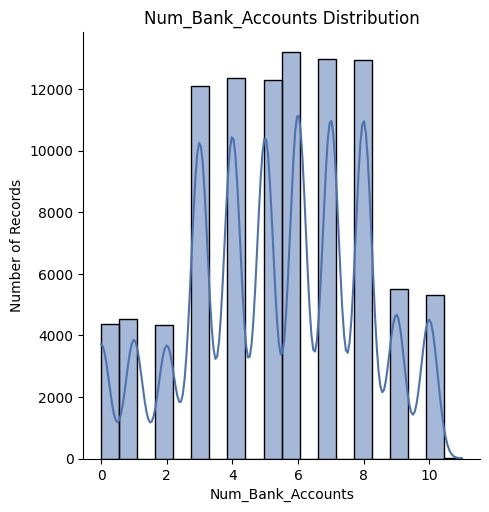

In [22]:
# cleaning
clean_numerical_field(df,groupby='Customer_ID',column='Num_Bank_Accounts',datatype='int')

# plotting
plot_displot(df,column = 'Num_Bank_Accounts', user_friendly_column_name='Num_Bank_Accounts')

In [23]:
get_column_details(df,"Num_Credit_Card")

Details of Num_Credit_Card column

 Datatype: int64

There are no null values

Number of unique values: 1179

Distribution of values:
Num_Credit_Card
5       18459
7       16615
6       16559
4       14030
3       13277
        ...  
791         1
1118        1
657         1
640         1
679         1
Name: count, Length: 1179, dtype: int64



-----------------------------------------------------

Cleaning steps 

Datatype is changed to int

Datatype of Num_Credit_Card is changed to int

Existing Min, Max Values:
0
1499

After Cleaning Min, Max Values:
0.0
11.0

Number of unique values after cleaning: 12

Number of null values after cleaning: 0

-----------------------------------------------------

Num_Credit_Card Distribution


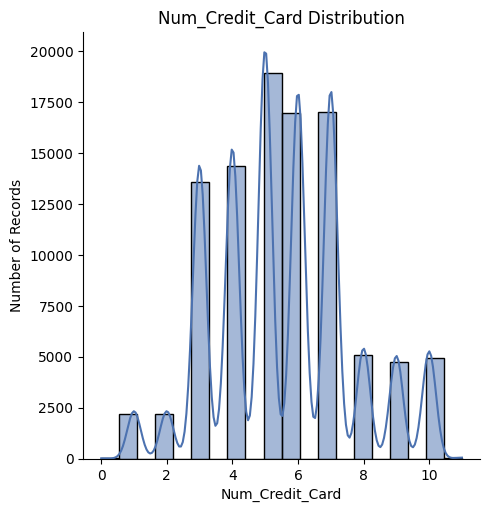

In [24]:
# cleaning
clean_numerical_field(df,groupby='Customer_ID',column='Num_Credit_Card',datatype='int')

# plotting
plot_displot(df,column = 'Num_Credit_Card', user_friendly_column_name='Num_Credit_Card')

In [25]:
get_column_details(df,"Interest_Rate")

Details of Interest_Rate column

 Datatype: int64

There are no null values

Number of unique values: 1750

Distribution of values:
Interest_Rate
8       5012
5       4979
6       4721
12      4540
10      4540
        ... 
4995       1
1899       1
2120       1
5762       1
5729       1
Name: count, Length: 1750, dtype: int64



-----------------------------------------------------

Cleaning steps 

Datatype is changed to float

Datatype of Interest_Rate is changed to float

Existing Min, Max Values:
1.0
5797.0

After Cleaning Min, Max Values:
1.0
34.0

Number of unique values after cleaning: 34

Number of null values after cleaning: 0

-----------------------------------------------------

Interest_Rate Distribution


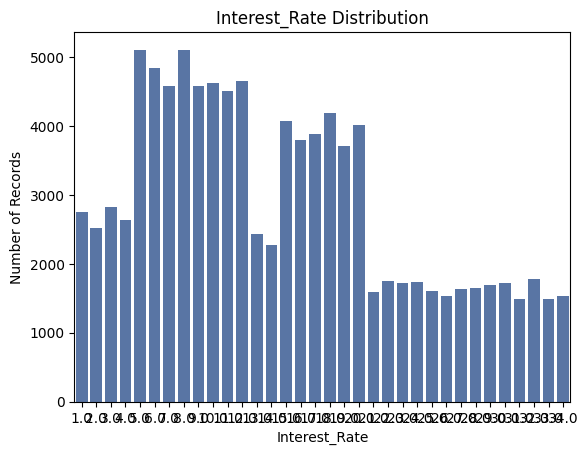

In [27]:
# cleaning
clean_numerical_field(df,groupby='Customer_ID',column='Interest_Rate')
# plot
plot_countplot(df,column = 'Interest_Rate', user_friendly_column_name='Interest_Rate')

In [26]:
get_column_details(df,"Num_of_Loan")

Details of Num_of_Loan column

 Datatype: object

There are no null values

Number of unique values: 434

Distribution of values:
Num_of_Loan
3        14386
2        14250
4        14016
0        10380
1        10083
         ...  
1320_        1
103          1
1444         1
392          1
966          1
Name: count, Length: 434, dtype: int64



-----------------------------------------------------

Cleaning steps 

Trailing and leading _ is removed

Datatype is changed to int

Datatype of Num_of_Loan is changed to int

Existing Min, Max Values:
-100
1496

After Cleaning Min, Max Values:
0.0
9.0

Number of unique values after cleaning: 10

Number of null values after cleaning: 0

-----------------------------------------------------

Num_of_Loan Distribution


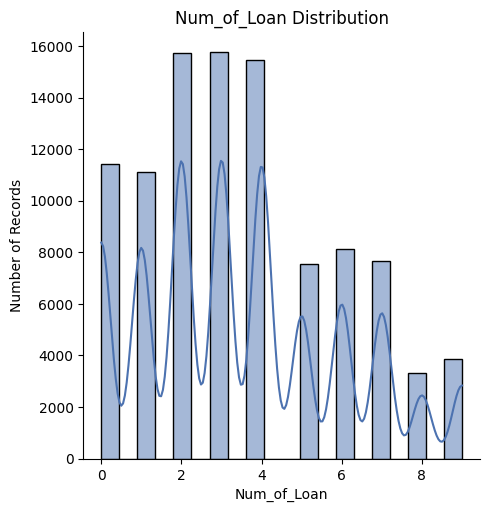

In [28]:
# cleaning
clean_numerical_field(df,groupby='Customer_ID',column='Num_of_Loan',strip='_',datatype='int')

# plotting
plot_displot(df,column = 'Num_of_Loan', user_friendly_column_name='Num_of_Loan')

In [29]:
get_column_details(df,"Delay_from_due_date")

Details of Delay_from_due_date column

 Datatype: int64

There are no null values

Number of unique values: 73

Distribution of values:
Delay_from_due_date
 15    3596
 13    3424
 8     3324
 14    3313
 10    3281
       ... 
-4       62
 65      56
-5       33
 66      32
 67      22
Name: count, Length: 73, dtype: int64



-----------------------------------------------------

Cleaning steps 

Existing Min, Max Values:
-5
67

After Cleaning Min, Max Values:
0.0
67.0

Number of unique values after cleaning: 85

Number of null values after cleaning: 0

-----------------------------------------------------

Delay_from_due_date Distribution


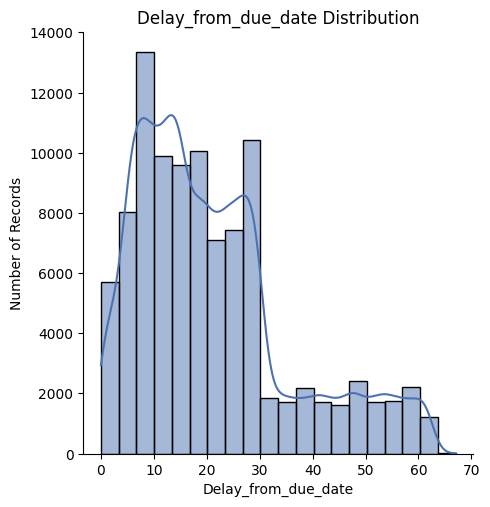

In [30]:
# cleaning
clean_numerical_field(df,groupby='Customer_ID',column='Delay_from_due_date')

# plotting
plot_displot(df,column = 'Delay_from_due_date', user_friendly_column_name='Delay_from_due_date')

In [31]:
get_column_details(df,"Num_of_Delayed_Payment")

Details of Num_of_Delayed_Payment column

 Datatype: object

There are 7002 null values

Number of unique values: 749

Distribution of values:
Num_of_Delayed_Payment
19      5327
17      5261
16      5173
10      5153
18      5083
        ... 
848_       1
4134       1
1530       1
1502       1
2047       1
Name: count, Length: 749, dtype: int64



-----------------------------------------------------

Cleaning steps 

Trailing and leading _ is removed

Datatype is changed to float

Datatype of Num_of_Delayed_Payment is changed to float

Existing Min, Max Values:
-3.0
4397.0

After Cleaning Min, Max Values:
0.0
28.0

Number of unique values after cleaning: 47

Number of null values after cleaning: 0

-----------------------------------------------------

Num_of_Delayed_Payment Distribution


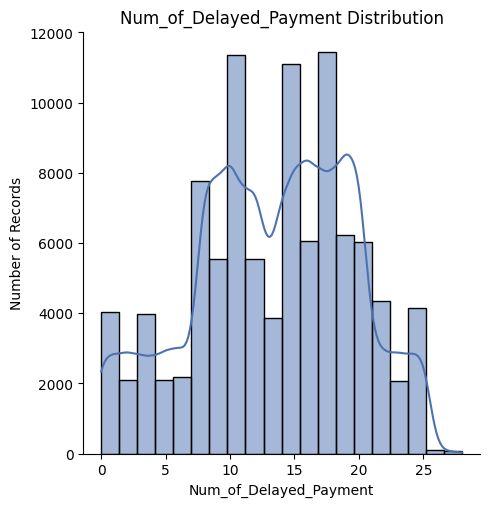

In [33]:
# cleaning
clean_numerical_field(df,groupby='Customer_ID',column='Num_of_Delayed_Payment',strip='_',datatype='float')

# plotting
plot_displot(df,column = 'Num_of_Delayed_Payment', user_friendly_column_name='Num_of_Delayed_Payment')

In [34]:
get_column_details(df,"Num_Credit_Inquiries")

Details of Num_Credit_Inquiries column

 Datatype: float64

There are 1965 null values

Number of unique values: 1223

Distribution of values:
Num_Credit_Inquiries
4.0       11271
3.0        8890
6.0        8111
7.0        8058
2.0        8028
          ...  
1721.0        1
1750.0        1
2397.0        1
621.0         1
74.0          1
Name: count, Length: 1223, dtype: int64



-----------------------------------------------------

Cleaning steps 

Datatype is changed to float

Datatype of Num_Credit_Inquiries is changed to float

Existing Min, Max Values:
0.0
2597.0

After Cleaning Min, Max Values:
0.0
17.0

Number of unique values after cleaning: 23

Number of null values after cleaning: 0

-----------------------------------------------------

Num_Credit_Inquiries Distribution


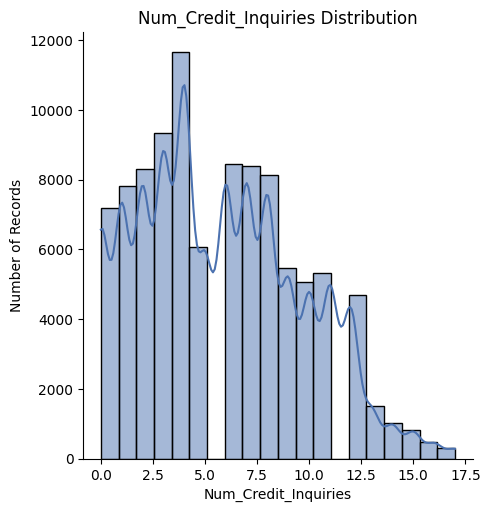

In [35]:
# cleaning
clean_numerical_field(df,groupby='Customer_ID',column='Num_Credit_Inquiries',datatype='float')

# plotting
plot_displot(df,column = 'Num_Credit_Inquiries', user_friendly_column_name='Num_Credit_Inquiries')

In [36]:
get_column_details(df,"Credit_Mix")

Details of Credit_Mix column

 Datatype: object

There are no null values

Number of unique values: 4

Distribution of values:
Credit_Mix
Standard    36479
Good        24337
_           20195
Bad         18989
Name: count, dtype: int64



-----------------------------------------------------

Cleaning steps 

Garbage value _ is replaced with np.nan
Number of missing values before filling with group mode: 20195

Number of missing values after filling with group mode: 0

-----------------------------------------------------

Credit_Mix Distribution


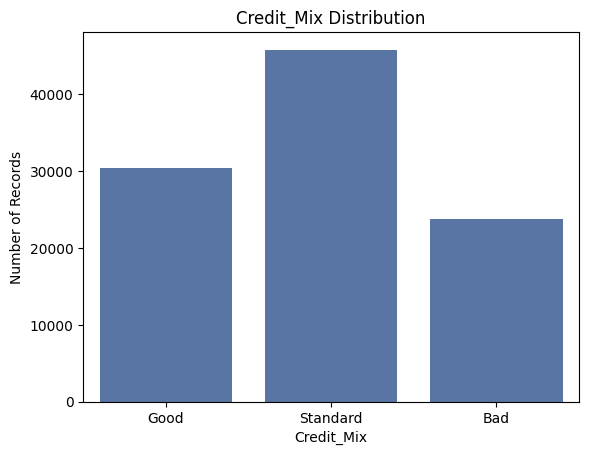

In [40]:
# cleaning
clean_categorical_field(df,groupby='Customer_ID',column='Credit_Mix',replace_value='_')

# plot
plot_countplot(df,column = 'Credit_Mix', user_friendly_column_name='Credit_Mix')

In [41]:
get_column_details(df,"Outstanding_Debt")

Details of Outstanding_Debt column

 Datatype: object

There are no null values

Number of unique values: 13178

Distribution of values:
Outstanding_Debt
1360.45     24
460.46      23
1151.7      23
1109.03     23
467.7       16
            ..
245.46_      1
645.77_      1
174.79_      1
1181.13_     1
1013.53_     1
Name: count, Length: 13178, dtype: int64



-----------------------------------------------------

Cleaning steps 

Trailing and leading _ is removed

Datatype is changed to float

Datatype of Outstanding_Debt is changed to float

Existing Min, Max Values:
0.23
4998.07

After Cleaning Min, Max Values:
0.23
4998.07

Number of unique values after cleaning: 12203

Number of null values after cleaning: 0

-----------------------------------------------------

Outstanding_Debt Distribution


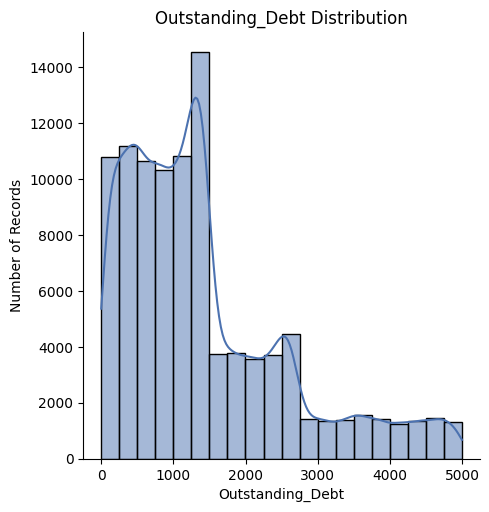

In [42]:
clean_numerical_field(df,groupby='Customer_ID',column='Outstanding_Debt',datatype='float',strip='_')

# plotting
plot_displot(df,column = 'Outstanding_Debt',user_friendly_column_name='Outstanding_Debt')

In [43]:
get_column_details(df,"Credit_Utilization_Ratio")

Details of Credit_Utilization_Ratio column

 Datatype: float64

There are no null values

Number of unique values: 99998

Distribution of values:
Credit_Utilization_Ratio
26.407909    2
33.163023    2
26.822620    1
30.462162    1
33.933755    1
            ..
38.730069    1
30.017515    1
27.279794    1
27.002436    1
34.192463    1
Name: count, Length: 99998, dtype: int64



-----------------------------------------------------

Credit_Utilization_Ratio Distribution


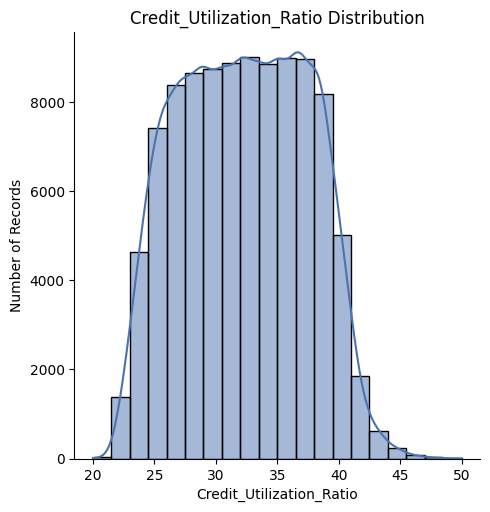

In [44]:
# no cleaning required

# plotting
plot_displot(df,column = 'Credit_Utilization_Ratio',user_friendly_column_name='Credit_Utilization_Ratio')

In [45]:
get_column_details(df,"Credit_History_Age")

Details of Credit_History_Age column

 Datatype: object

There are 9030 null values

Number of unique values: 404

Distribution of values:
Credit_History_Age
15 Years and 11 Months    446
19 Years and 4 Months     445
19 Years and 5 Months     444
17 Years and 11 Months    443
19 Years and 3 Months     441
                         ... 
0 Years and 3 Months       20
0 Years and 2 Months       15
33 Years and 7 Months      14
33 Years and 8 Months      12
0 Years and 1 Months        2
Name: count, Length: 404, dtype: int64



-----------------------------------------------------

Credit_History_Age_In_Months Distribution


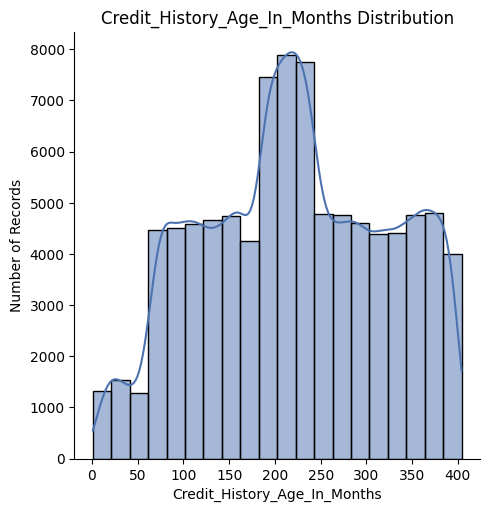

In [46]:
def Month_converter(val):
  if pd.notnull(val):
    years = int(val.split()[0])
    months = int(val.split()[3])
    return years*12 + months
  else:
    return val
# cleaning
df['Credit_History_Age_In_Months'] = df['Credit_History_Age'].apply(lambda x: Month_converter(x)).astype(float)

# plotting
plot_displot(df,column = 'Credit_History_Age_In_Months',user_friendly_column_name='Credit_History_Age_In_Months')

In [48]:
get_column_details(df,"Credit_History_Age_In_Months")

Details of Credit_History_Age_In_Months column

 Datatype: float64

There are 9030 null values

Number of unique values: 404

Distribution of values:
Credit_History_Age_In_Months
191.0    446
232.0    445
233.0    444
215.0    443
231.0    441
        ... 
3.0       20
2.0       15
403.0     14
404.0     12
1.0        2
Name: count, Length: 404, dtype: int64


In [47]:
get_column_details(df,"Total_EMI_per_month")

Details of Total_EMI_per_month column

 Datatype: float64

There are no null values

Number of unique values: 14950

Distribution of values:
Total_EMI_per_month
0.000000        10613
49.574949           8
73.533361           8
22.960835           8
38.661127           8
                ...  
36408.000000        1
23760.000000        1
24612.000000        1
24325.000000        1
58638.000000        1
Name: count, Length: 14950, dtype: int64



-----------------------------------------------------

Cleaning steps 

Existing Min, Max Values:
0.0
82331.0

After Cleaning Min, Max Values:
0.0
70943.0

Number of unique values after cleaning: 11300

Number of null values after cleaning: 0

-----------------------------------------------------

Total_EMI_per_month Distribution


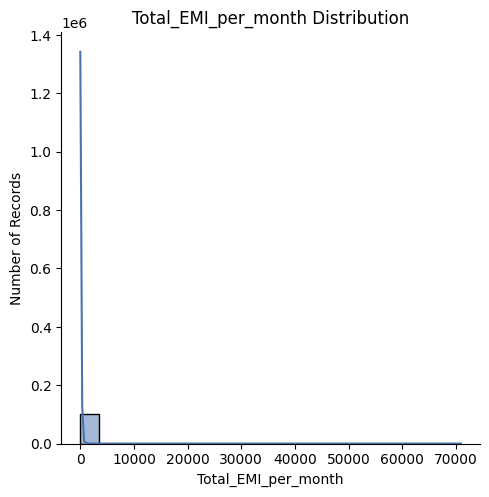

In [49]:
#cleaning
clean_numerical_field(df,groupby='Customer_ID',column='Total_EMI_per_month')

# plotting
plot_displot(df,column = 'Total_EMI_per_month',user_friendly_column_name='Total_EMI_per_month')

In [50]:
get_column_details(df,"Amount_invested_monthly")

Details of Amount_invested_monthly column

 Datatype: object

There are 4479 null values

Number of unique values: 91049

Distribution of values:
Amount_invested_monthly
__10000__      4305
0               169
80.41529544       1
36.66235139       1
89.73848936       1
               ... 
36.54190859       1
93.45116319       1
140.8097222       1
38.7393767        1
167.1638652       1
Name: count, Length: 91049, dtype: int64


In [51]:
clean_numerical_field?


-----------------------------------------------------

Cleaning steps 

Trailing and leading _ is removed

Datatype is changed to float

Datatype of Amount_invested_monthly is changed to float

Existing Min, Max Values:
0.0
10000.0

After Cleaning Min, Max Values:
0.0
10000.0

Number of unique values after cleaning: 67721

Number of null values after cleaning: 0

-----------------------------------------------------

Amount_invested_monthly Distribution


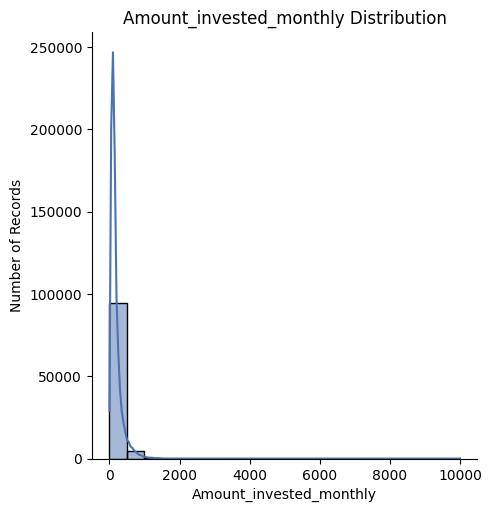

In [53]:
clean_numerical_field(df,groupby='Customer_ID',column='Amount_invested_monthly',strip='_',datatype='float')

# plotting
plot_displot(df,column = 'Amount_invested_monthly',user_friendly_column_name='Amount_invested_monthly')

In [54]:
get_column_details(df,"Monthly_Balance")

Details of Monthly_Balance column

 Datatype: object

There are 1200 null values

Number of unique values: 98790

Distribution of values:
Monthly_Balance
__-333333333333333333333333333__    9
350.0148691                         2
695.0571561                         2
312.4940887                         1
604.3402009                         1
                                   ..
280.6862317                         1
366.289038                          1
151.1882696                         1
306.7502785                         1
393.673696                          1
Name: count, Length: 98790, dtype: int64



-----------------------------------------------------

Cleaning steps 

Trailing and leading _ is removed

Datatype is changed to float

Datatype of Monthly_Balance is changed to float

Existing Min, Max Values:
-3.333333333333333e+26
1602.040519

After Cleaning Min, Max Values:
0.095482496
1602.040519

Number of unique values after cleaning: 87670

Number of null values after cleaning: 0

-----------------------------------------------------

Monthly_Balance Distribution


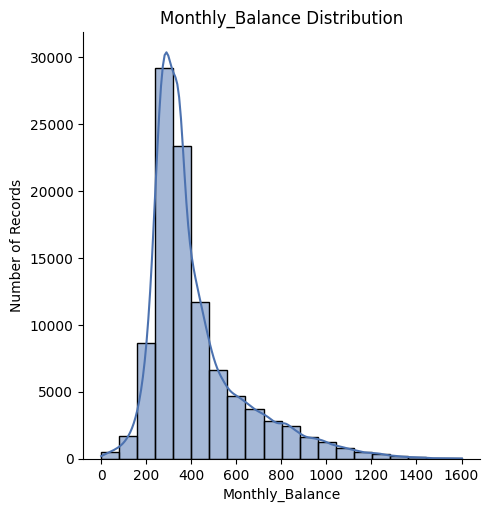

In [56]:
# cleaning
df['Monthly_Balance'] = df['Monthly_Balance'].replace('_',np.nan)
clean_numerical_field(df,groupby='Customer_ID',column='Monthly_Balance',strip='_',datatype='float',replace_value='__-333333333333333333333333333__')

# plotting
plot_displot(df,column = 'Monthly_Balance',user_friendly_column_name='Monthly_Balance')

In [61]:
get_column_details(df,'Num_of_Loan')

Details of Num_of_Loan column

 Datatype: float64

There are no null values

Number of unique values: 10

Distribution of values:
Num_of_Loan
3.0    15752
2.0    15712
4.0    15456
0.0    11408
1.0    11128
6.0     8144
7.0     7680
5.0     7528
9.0     3856
8.0     3336
Name: count, dtype: int64


In [65]:
df['Type_of_Loan'].replace([np.nan],'Not Specified', inplace = True)

In [66]:
df['Type_of_Loan'] = df['Type_of_Loan'].apply(lambda x: x.lower().replace('and','').replace(', ',',').strip() if pd.notna(x) else x)

In [67]:
get_column_details(df,'Type_of_Loan')

Details of Type_of_Loan column

 Datatype: object

There are no null values

Number of unique values: 6260

Distribution of values:
Type_of_Loan
not specified                                                                                                                12816
credit-builder loan                                                                                                           1280
personal loan                                                                                                                 1272
debt consolidation loan                                                                                                       1264
student loan                                                                                                                  1240
                                                                                                                             ...  
not specified,mortgage loan,auto loan, payday loan                   

In [75]:
# split the column values by commas seperate by multiple loan types
df['Type_of_Loan_Split'] = df['Type_of_Loan'].str.split(',')

# explode the list of loan types into separate rows
exploded_loans = df.explode('Type_of_Loan_Split')

#
exploded_loans['Type_of_Loan_Split'] = exploded_loans['Type_of_Loan_Split'].str.strip()

# get unique loan types and map into numeric ids
unique_loan_types = exploded_loans['Type_of_Loan_Split'].unique()

# creating a dictionary mapping
loan_type_dict = {idx: loan_type for idx, loan_type in enumerate(sorted(unique_loan_types))}

# display the result
loan_type_dict

{0: 'auto loan',
 1: 'credit-builder loan',
 2: 'debt consolidation loan',
 3: 'home equity loan',
 4: 'mortgage loan',
 5: 'not specified',
 6: 'payday loan',
 7: 'personal loan',
 8: 'student loan'}

In [55]:
get_column_details(df,"Payment_Behaviour")

Details of Payment_Behaviour column

 Datatype: object

There are no null values

Number of unique values: 7

Distribution of values:
Payment_Behaviour
Low_spent_Small_value_payments      25513
High_spent_Medium_value_payments    17540
Low_spent_Medium_value_payments     13861
High_spent_Large_value_payments     13721
High_spent_Small_value_payments     11340
Low_spent_Large_value_payments      10425
!@9#%8                               7600
Name: count, dtype: int64



-----------------------------------------------------

Cleaning steps 

Garbage value !@9#%8 is replaced with np.nan
Number of missing values before filling with group mode: 7600

Number of missing values after filling with group mode: 0

-----------------------------------------------------

Payment Behaviour Distribution


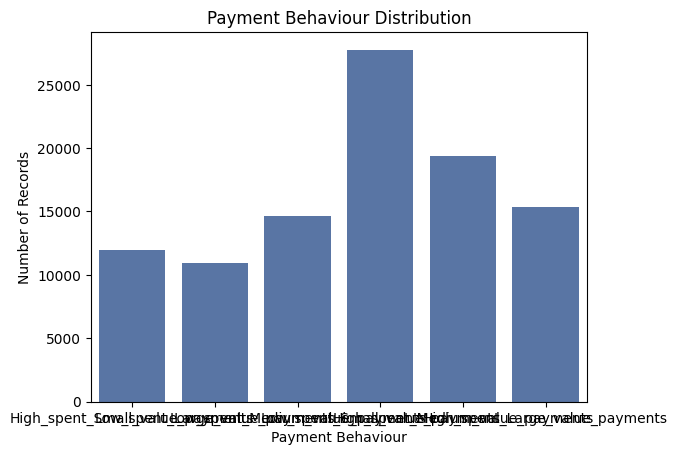

In [57]:
# cleaning
clean_categorical_field(df,groupby='Customer_ID',column='Payment_Behaviour',replace_value='!@9#%8')

# plotting
plot_countplot(df,column = 'Payment_Behaviour',user_friendly_column_name='Payment Behaviour')

In [62]:
df.isna().sum()

,0
ID,0
Customer_ID,0
Month,0
Name,0
Age,0
SSN,0
Occupation,0
Annual_Income,0
Monthly_Inhand_Salary,0
Num_Bank_Accounts,0


#Label Encoding Features

In [77]:
df['Payment_of_Min_Amount'] = df['Payment_of_Min_Amount'].replace({'No': 0, 'Yes': 1, 'NM':0})

In [78]:
df['Credit_Mix'] = df['Credit_Mix'].replace({'Bad': 0, 'Standard': 1, 'Good':2})

df["Payment_Behaviour"] = df["Payment_Behaviour"].replace({
      "Low_spent_Small_value_payments": 1,
        "High_spent_Small_value_payments": 2,
        "Low_spent_Medium_value_payments": 3,
        "High_spent_Medium_value_payments": 4,
        "Low_spent_Large_value_payments": 5,
        "High_spent_Large_value_payments": 6


  })

#Feature Engineering

In [79]:
# debt to income ratio

df['Monthly_Debt_to_Income_Ratio'] = df['Outstanding_Debt'] / df['Monthly_Inhand_Salary']

df['Monthly_Debt_Repayment_Capacity'] = df['Monthly_Inhand_Salary'] - df['Total_EMI_per_month']

df['Payment_History_Score'] = (
    -1 * df['Delay_from_due_date'] -1 * df['Num_of_Delayed_Payment'] + 1 * df['Payment_of_Min_Amount']
)

In [81]:
df[['Delay_from_due_date','Num_of_Delayed_Payment','Payment_of_Min_Amount', 'Payment_History_Score']]

,Delay_from_due_date,Num_of_Delayed_Payment,Payment_of_Min_Amount,Payment_History_Score
0,3.0,14.0,0,-17.0
1,3.0,14.0,0,-17.0
2,3.0,14.0,0,-17.0
3,5.0,14.0,0,-19.0
4,6.0,14.0,0,-20.0
...,...,...,...,...
99995,23.0,6.0,0,-29.0
99996,18.0,6.0,0,-24.0
99997,27.0,6.0,0,-33.0
99998,20.0,6.0,0,-26.0


Selected features for credit score calulcation with their weights:
1. Payment histoRy score
  - Weight: 0.40
  - Strongest predictor of future credit behavior.
2. Credit History Age in Months
  - Weight: 0.20
  - Longer credit history indicates responsible credit usage.Weighted moderately to reflect its significance.
3. Monthly Debt-to-Income Ratio (MDTIR)
  - Weight: 0.15
  - Lower ratio indicates better ability to manage debt.Weighted lower due to potential fluctuations in income.
4. Credit Utilization Ratio
  - Weight: 0.10
  - Lower ratio suggests responsible credit card usage.Weighted lower as it's a snapshot of current utilization.
5. Monthly Debt Repayment Capacity
  - Weight: 0.05
  - Reflects ability to manage existing debt.
6. Outstanding Debt
  - Weight: 0.05
  - Higher debt increases risk of default.
7. Num_Credit_Inquiries
  - Weight: 0.03
  - Fewer inquiries suggest lower credit-seeking behavior.
8. Payment Behaviour
  - Weight: 0.02
  - Insights into spending patterns and payment tendencies.

In [82]:
grouped_data = df.groupby('Customer_ID').agg({
    'Payment_History_Score': 'mean',
    'Credit_History_Age_In_Months': 'max',
    'Monthly_Debt_to_Income_Ratio': 'mean',
    'Credit_Utilization_Ratio': 'mean',
    'Monthly_Debt_Repayment_Capacity': 'mean',
    'Outstanding_Debt': 'mean',
    'Num_Credit_Inquiries': 'sum',
    'Payment_Behaviour': 'mean'
})

In [83]:
grouped_data.head()

,Payment_History_Score,Credit_History_Age_In_Months,Monthly_Debt_to_Income_Ratio,Credit_Utilization_Ratio,Monthly_Debt_Repayment_Capacity,Outstanding_Debt,Num_Credit_Inquiries,Payment_Behaviour
Customer_ID,,,,,,,,
CUS_0x1000,-85.625,129.0,0.577538,33.477546,2663.220577,1562.91,88.0,3.375
CUS_0x1009,-25.125,372.0,0.047685,29.839984,4142.023533,202.68,24.0,3.625
CUS_0x100b,-21.000,190.0,0.107877,34.841449,9549.782500,1030.20,8.0,4.000
CUS_0x1011,-41.125,190.0,0.090833,27.655897,5085.437561,473.14,56.0,3.125
CUS_0x1013,-21.000,214.0,0.154917,31.933940,7734.396916,1233.51,24.0,4.000


In [84]:
# standardizing values
grouped_data = (grouped_data - grouped_data.mean()) / grouped_data.std()

In [85]:
grouped_data['Credit_score'] = (
    grouped_data['Payment_History_Score'] * 0.40 +
    grouped_data['Credit_History_Age_In_Months'] * 0.20 +
    grouped_data['Monthly_Debt_to_Income_Ratio'] * 0.15 +
    grouped_data['Credit_Utilization_Ratio'] * 0.10 +
    grouped_data['Monthly_Debt_Repayment_Capacity'] * 0.05 +
    grouped_data['Outstanding_Debt'] * 0.05 +
    grouped_data['Num_Credit_Inquiries'] * 0.03 +
    grouped_data['Payment_Behaviour'] * 0.02
)

In [88]:
# Normalize the score
grouped_data['Credit_score'] = (grouped_data['Credit_score'] - grouped_data['Credit_score'].min())/(grouped_data['Credit_score'].max() - grouped_data['Credit_score'].min()) * 100

In [89]:
grouped_data['Credit_score']

,Credit_score
Customer_ID,
CUS_0x1000,6.887100
CUS_0x1009,59.076045
CUS_0x100b,62.256493
CUS_0x1011,31.632617
CUS_0x1013,58.973897
...,...
CUS_0xff3,59.492158
CUS_0xff4,52.503039
CUS_0xff6,77.581878


#Summary

1. We have record of 12500 unique customers
2. In the dataset, we have data for each customer over the course of 8 months(from January to August)
3. We have following types of loans
  - auto loan
  - credit-builder loan
  - debt consolidation loan
  - home equity loan
  - mortgage loan
  - not specified
  - payday loan
  - personal loan
  - student loan
4. Most customers have a low Annual income and Distribution is right skewed.
5. Most customers have a low monthly income. Distribution is right skewed.
6. Majority of customers has no. of bank accounts between 3 to 8.
7. Number of credit cards range from 0 to 11 with most of the customers having credit cards in the range of 3 to 7 with peak at 5.
8. Interest rate ranges from 1% to 34%
9. Delay from due date is concentrated between 0 to 30 days.
10. Very few customers invest greater than 2k amount per month
11. Customers typically take anywhere from 2 to 4 loans, with the maximum number being 9.

For credit score calculation we have used following features with their respective weights
- Selected features for credit score calulcation with their weights:
1. Payment histroy score: (Weight: 0.40)
2. Credit History Age in Months (Weight: 0.20)
3. Monthly Debt-to-Income Ratio (MDTIR) (Weight: 0.15)
4. Credit Utilization Ratio (Weight: 0.10)
5. Monthly Debt Repayment Capacity (Weight: 0.05)
6. Outstanding Debt (Weight: 0.05)
7. Num_Credit_Inquiries (Weight: 0.03)
8. Payment Behaviour (Weight: 0.02)

**Recommendation:**
- This is a very simple model that we have used for credit score calculation but to improve the reliabality of this score.
- We can explore with different weighting schemes, or try diffrent features.
- we should also explore other methods preferably ML based solutions that you can exploxe once you study different ML algorithms.